In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DecimalType, TimestampType
from pyspark.sql.functions import monotonically_increasing_id

In [0]:
filerdd = sc.textFile("dbfs:/FileStore/tables/Auto_Theft_Open_Data.csv")

In [0]:
no_headers = filerdd.zipWithIndex().filter(lambda x: x[1] > 0).map(lambda x: x[0])
splitting = no_headers.map(lambda x: x.split(","))

In [0]:
def select_columns(element):
    # Example: Keep only the first and third columns
    return (element[len(element) - 2], element[len(element) - 1], element[len(element) - 5],element[5],element[16],element[17])

In [0]:
subset_cols = splitting.map(select_columns)
valid_entry = subset_cols.filter(lambda x: float(x[0]) != 0 and float(x[1]) != 0)
rdd_with_index = valid_entry.zipWithIndex()

In [0]:
coordinates = rdd_with_index.map(lambda x: (x[0][0],x[0][1]))

In [0]:
kmeans = KMeans(n_clusters=10,random_state=42)
clusters = kmeans.fit_predict(coordinates.collect())
clusters_b = sc.broadcast(clusters)

In [0]:
def add_clusters(row):
    return (row[0][0],row[0][1],row[0][2],row[0][3],row[0][4],row[0][5],row[1],int(clusters_b.value[row[-1]],))

In [0]:
rdd_with_clusters = rdd_with_index.map(add_clusters)

clusters_rdd = sc.parallelize(clusters)

cluster_individual = clusters_rdd.map(lambda x: (x,1))

cluster_counts = cluster_individual.reduceByKey(lambda x,y: x+y)

line_count = rdd_with_clusters.count()

cluster_prob = cluster_counts.map(lambda x: (x[0],x[1]/line_count))

In [0]:
display(rdd_with_clusters.collect())

_1,_2,_3,_4,_5,_6,_7,_8
-79.3067569032264,43.7346523976587,Victoria Village,2013/12/31 05:00:00+00,Tuesday,17,0,4
-79.2361887165113,43.7218470872821,Cliffcrest,2014/01/01 05:00:00+00,Wednesday,15,1,4
-79.5294778490325,43.6184722332727,Etobicoke City Centre,2013/12/25 05:00:00+00,Wednesday,0,2,0
-79.5953643923368,43.7442806139144,Mount Olive-Silverstone-Jamestown,2014/01/01 05:00:00+00,Wednesday,15,3,3
-79.5152325705061,43.6827267518339,Edenbridge-Humber Valley,2014/01/01 05:00:00+00,Wednesday,19,4,0
-79.2739359096363,43.8135550930882,Agincourt North,2014/01/02 05:00:00+00,Thursday,1,5,9
-79.3130803404593,43.6893124311731,Woodbine-Lumsden,2014/01/02 05:00:00+00,Thursday,9,6,4
-79.3271469347394,43.7274925792288,Banbury-Don Mills,2014/01/03 05:00:00+00,Friday,19,7,4
-79.2591698455305,43.7784380272832,Bendale-Glen Andrew,2014/01/03 05:00:00+00,Friday,17,8,9
-79.5132172795793,43.7393831786129,Glenfield-Jane Heights,2014/01/02 05:00:00+00,Thursday,23,9,6


In [0]:
centroids = kmeans.cluster_centers_

scaling_factor = 100
cluster_prob_scaled = cluster_prob.map(lambda x: [x[0],x[1]*scaling_factor])

centroid_sizes = cluster_prob_scaled.map(lambda x: x[1]*scaling_factor)

In [0]:
lng = centroids[:,0]
lat = centroids[:,1]

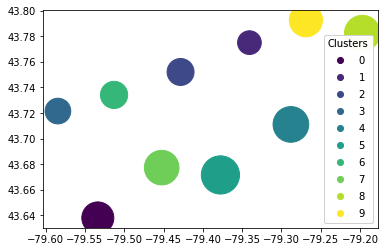

In [0]:
scatter = plt.scatter(lng,lat,s=centroid_sizes.collect(),c=range(centroid_sizes.count()),cmap='viridis')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [0]:
schema = StructType([
    StructField("Longitude", StringType(), True),
    StructField("Latitude", StringType(), True),
    StructField("Neighborhood", StringType(), True),
    StructField("Timestamp", StringType(), True),
    StructField("Day", StringType(), True),
    StructField("Hour", StringType(), True),
    StructField("Index", StringType(), True),
    StructField("Cluster", IntegerType(), True),
])

In [0]:
dataframe = spark.createDataFrame(rdd_with_clusters,schema=schema)

In [0]:
dataframe.show()

+-----------------+----------------+--------------------+--------------------+----------+----+-----+-------+
|        Longitude|        Latitude|        Neighborhood|           Timestamp|       Day|Hour|Index|Cluster|
+-----------------+----------------+--------------------+--------------------+----------+----+-----+-------+
|-79.3067569032264|43.7346523976587|    Victoria Village|2013/12/31 05:00:...|Tuesday   |  17|    0|      4|
|-79.2361887165113|43.7218470872821|          Cliffcrest|2014/01/01 05:00:...|Wednesday |  15|    1|      4|
|-79.5294778490325|43.6184722332727|Etobicoke City Ce...|2013/12/25 05:00:...|Wednesday |   0|    2|      0|
|-79.5953643923368|43.7442806139144|Mount Olive-Silve...|2014/01/01 05:00:...|Wednesday |  15|    3|      3|
|-79.5152325705061|43.6827267518339|Edenbridge-Humber...|2014/01/01 05:00:...|Wednesday |  19|    4|      0|
|-79.2739359096363|43.8135550930882|     Agincourt North|2014/01/02 05:00:...|Thursday  |   1|    5|      9|
|-79.3130803404593|

In [0]:
neighborhoods = dataframe.groupBy(col('Neighborhood')).count().sort('count')

In [0]:
neighborhoods.show()

+--------------------+-----+
|        Neighborhood|count|
+--------------------+-----+
|       North Toronto|   64|
|           Guildwood|   66|
|    Woodbine-Lumsden|   67|
|         Blake-Jones|   69|
|     Broadview North|   77|
|                 NSA|   82|
|Playter Estates-D...|   88|
|             Ionview|   89|
|          University|   92|
|       Old East York|   99|
|      Yonge-St.Clair|  101|
|South Eglinton-Da...|  103|
|      Bay-Cloverhill|  107|
|     West Queen West|  110|
|  Lambton Baby Point|  110|
|            Danforth|  110|
|         Regent Park|  111|
|   Woodbine Corridor|  115|
|      Dufferin Grove|  122|
|  Caledonia-Fairbank|  124|
+--------------------+-----+
only showing top 20 rows

